# 1. Importing Libraries



In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import calendar

# 2. Converting the Data

In [2]:
input_file= '/content/BA Assignment Walmart Sales.xlsx'
df= pd.read_excel(input_file)
output_file= '/content/output_file.csv'
df.to_csv(output_file, index=False)
print("Conversion complete.", output_file)

Conversion complete. /content/output_file.csv


# 3. Reading Data

In [3]:
db= pd.read_csv('/content/output_file.csv')

In [4]:
db.sample(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating
756,785-96-0615,B,Mandalay,Member,Female,Electronic accessories,35.74,8,2/17/2019,15:28:00,Ewallet,4.9
388,394-41-0748,A,Naypyitaw,Member,Female,Fashion accessories,54.07,9,1/27/2019,14:55:00,Ewallet,9.5
14,829-34-3910,B,Yangon,Normal,Female,Health and beauty,71.38,10,3/29/2019,19:21:00,Cash,5.7
306,286-01-5402,C,Yangon,Normal,Female,Sports and travel,40.23,7,3/30/2019,13:22:00,Cash,9.6
745,390-17-5806,B,Naypyitaw,Member,Female,Food and beverages,38.42,1,2/2/2019,16:33:00,Cash,8.6


# 4. Data Preprocessing

In [5]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1000 non-null   object 
 1   Branch         1000 non-null   object 
 2   City           1000 non-null   object 
 3   Customer type  1000 non-null   object 
 4   Gender         1000 non-null   object 
 5   Product line   1000 non-null   object 
 6   Unit price     1000 non-null   float64
 7   Quantity       1000 non-null   int64  
 8   Date           1000 non-null   object 
 9   Time           1000 non-null   object 
 10  Payment        1000 non-null   object 
 11  Rating         1000 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 93.9+ KB


In [6]:
db.describe()

,Unit price,Quantity,Rating
count,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,6.97270
std,26.494628,2.923431,1.71858
min,10.080000,1.000000,4.00000
25%,32.875000,3.000000,5.50000
50%,55.230000,5.000000,7.00000
75%,77.935000,8.000000,8.50000
max,99.960000,10.000000,10.00000


# 4. Analysis and Results

## **A.** Analyzing the performance of sales and revenue at the city and branch level

In [7]:
db['Date']= pd.to_datetime(db['Date'])
db['Total Revenue']= db['Unit price']*db['Quantity']

In [13]:
city_performance = db.groupby('City').agg({'Total Revenue': 'sum', 'Quantity': 'sum'}).reset_index()
city_performance.columns = ['City', 'Total Revenue', 'Total Quantity']

In [14]:
branch_performance = db.groupby('Branch').agg({'Total Revenue': 'sum', 'Quantity': 'sum'}).reset_index()
branch_performance.columns = ['Branch', 'Total Revenue', 'Total Quantity']

In [15]:
print("Performance at the City Level:")
print(city_performance)

print("\nPerformance at the Branch Level:")
print(branch_performance)

Performance at the City Level:
        City  Total Revenue  Total Quantity
0   Mandalay      101140.64            1820
1  Naypyitaw      105303.53            1831
2     Yangon      101143.21            1859

Performance at the Branch Level:
  Branch  Total Revenue  Total Quantity
0      A      103763.00            1883
1      B      107567.19            1899
2      C       96257.19            1728


In [23]:
custom_palette = sns.color_palette("Paired", 3)
sns.set_palette(custom_palette)
sns.set_style("whitegrid")

fig= px.bar(city_performance, x='City', y='Total Revenue', title='Total Revenue by City',
             labels={'Total Revenue': 'Total Revenue', 'City': 'City'}, color='City')
fig.show()

fig= px.bar(city_performance, x='City', y='Total Quantity', title='Sales by City',
             labels={'Total Quantity': 'Total Quantity', 'City': 'City'}, color='City')
fig.show()

In [28]:
fig = px.pie(city_performance, values='Total Revenue', names='City', title='Total Revenue Distribution by City')
fig.show()
fig = px.pie(city_performance, values='Total Quantity', names='City', title='Total Quantity Distribution by City')
fig.show()

In [25]:
custom_palette = sns.color_palette("Paired", 3)
sns.set_palette(custom_palette)
sns.set_style("whitegrid")

fig = px.bar(branch_performance, x='Branch', y='Total Revenue', title='Total Revenue by Branch',
             labels={'Total Revenue': 'Total Revenue', 'Branch': 'Branch'}, color='Branch')
fig.show()

fig = px.bar(branch_performance, x='Branch', y='Total Quantity', title='Total Quantity by Branch',
             labels={'Total Quantity': 'Total Quantity', 'Branch': 'Branch'}, color='Branch')
fig.show()

In [29]:
fig_revenue = px.pie(branch_performance, values='Total Revenue', names='Branch', title='Total Revenue Distribution by Branch')
fig_revenue.show()
fig_quantity = px.pie(branch_performance, values='Total Quantity', names='Branch', title='Total Quantity Distribution by Branch')
fig_quantity.show()

In [31]:
city_customer_count = db.groupby(['City', 'Customer type']).size().reset_index(name='Count')

fig = px.bar(city_customer_count, x='City', y='Count', color='Customer type',
             title='Customer Type Comparison Across Cities', barmode='group',
             labels={'Count': 'Customer Count', 'City': 'City', 'Customer type': 'Customer Type'})
fig.show()

## **B.** Finding the average price of an item sold at each branch of the city

In [32]:
average_price= db.groupby(['Branch', 'City']).agg({'Unit price': 'mean'}).reset_index()

In [33]:
print(average_price)

  Branch       City  Unit price
0      A   Mandalay   53.353866
1      A  Naypyitaw   54.123182
2      A     Yangon   55.639298
3      B   Mandalay   56.133305
4      B  Naypyitaw   57.785688
5      B     Yangon   56.011062
6      C   Mandalay   57.958316
7      C  Naypyitaw   57.941009
8      C     Yangon   52.684602


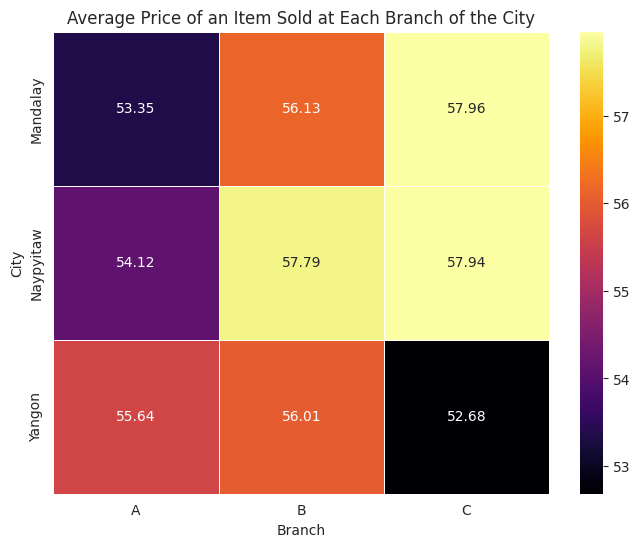

In [37]:
pivot_table= average_price.pivot_table(index='City', columns='Branch', values='Unit price')
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='inferno', fmt='.2f', linewidths=0.5)
plt.title('Average Price of an Item Sold at Each Branch of the City')
plt.xlabel('Branch')
plt.ylabel('City')
plt.show()

## **C.** Analyze the performance of sales, Month over Month across the Product line, Gender, and Payment Method

In [69]:
db['Month'] = db['Date'].dt.month

db['Month'] = db['Month'].apply(lambda x: calendar.month_name[int(x)])

months_order = [calendar.month_name[i] for i in range(1, 4)]
db['Month'] = pd.Categorical(db['Month'], categories=months_order, ordered=True)

In [70]:
group_data= db.groupby(['Month', 'Product line', 'Gender', 'Payment']).agg({'Quantity': 'sum', 'Unit price': 'sum'}).reset_index()
group_data['Total Sales']= group_data['Quantity'] * group_data['Unit price']

In [71]:
print(group_data)

       Month            Product line  Gender      Payment  Quantity  \
0    January  Electronic accessories  Female         Cash        52   
1    January  Electronic accessories  Female  Credit card        54   
2    January  Electronic accessories  Female      Ewallet        43   
3    January  Electronic accessories    Male         Cash        62   
4    January  Electronic accessories    Male  Credit card        43   
..       ...                     ...     ...          ...       ...   
103    March       Sports and travel  Female  Credit card        52   
104    March       Sports and travel  Female      Ewallet        53   
105    March       Sports and travel    Male         Cash        36   
106    March       Sports and travel    Male  Credit card        60   
107    March       Sports and travel    Male      Ewallet        86   

     Unit price  Total Sales  
0        534.48     27792.96  
1        371.20     20044.80  
2        251.77     10826.11  
3        552.72     342

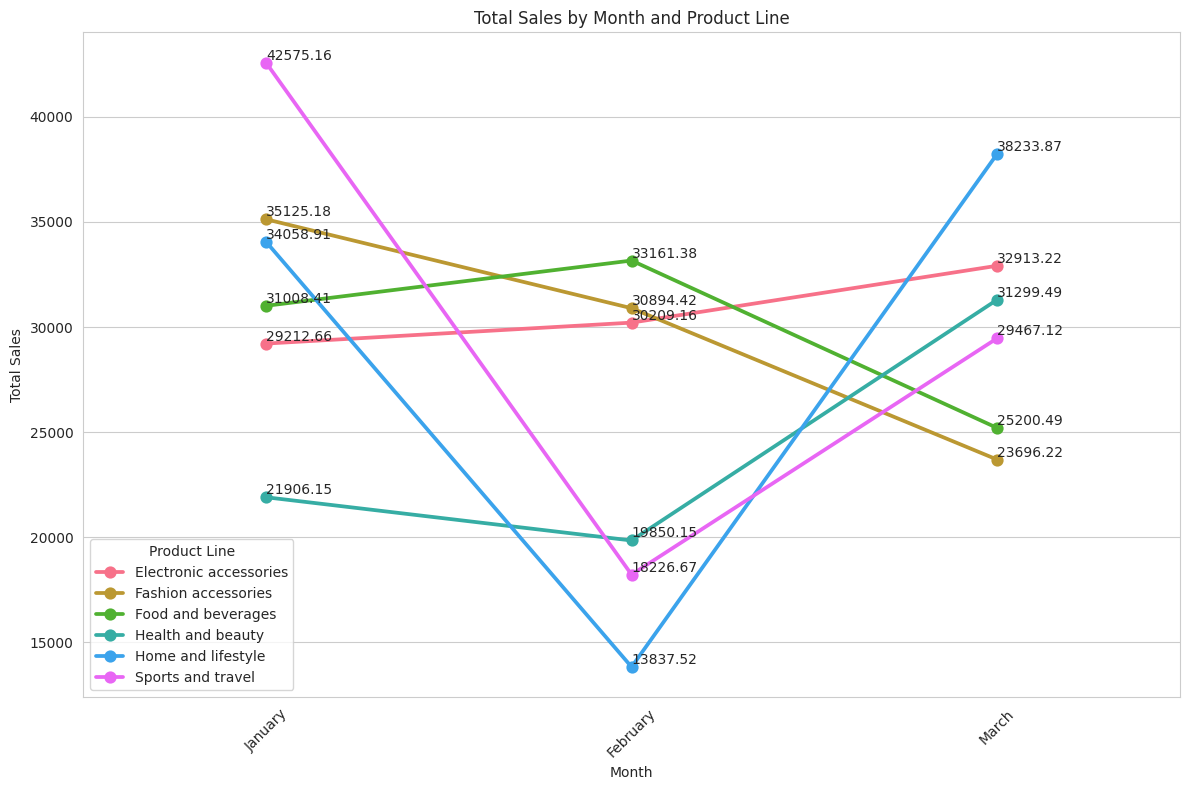

In [72]:
plt.figure(figsize=(12, 8))
ax = sns.pointplot(x='Month', y='Total Sales', hue='Product line', data=group_data, errorbar=None)
plt.title('Total Sales by Month and Product Line')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Product Line')

for line in ax.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        plt.text(x, y, f'{y:.2f}', ha='left', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

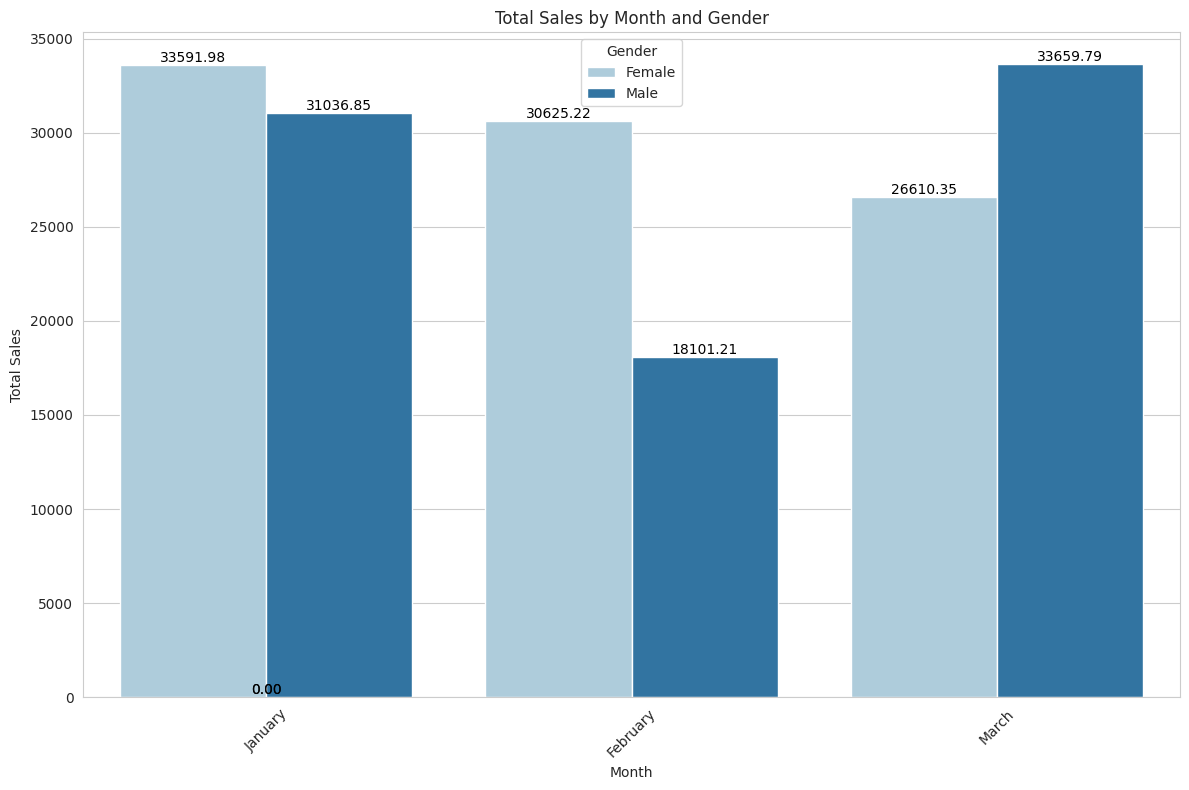

In [75]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Month', y='Total Sales', hue='Gender', data=group_data, errorbar=None)
plt.title('Total Sales by Month and Gender')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Gender')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                        textcoords='offset points')
plt.tight_layout()
plt.show()

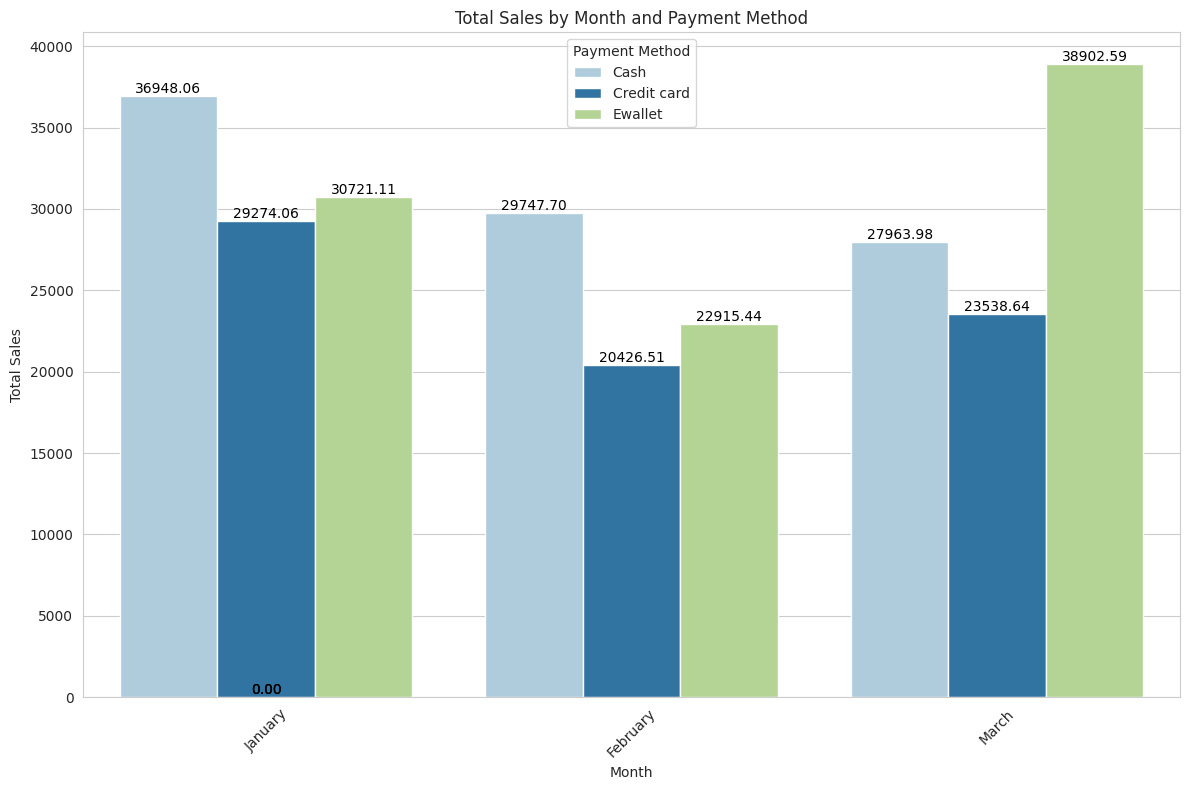

In [76]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Month', y='Total Sales', hue='Payment', data=group_data, errorbar=None)
plt.title('Total Sales by Month and Payment Method')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Payment Method')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                       textcoords='offset points')
plt.tight_layout()
plt.show()

In [78]:
numeric_columns = db.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_columns.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
               Unit price  Quantity    Rating  Total Revenue
Unit price       1.000000  0.010778 -0.008778       0.633962
Quantity         0.010778  1.000000 -0.015815       0.705510
Rating          -0.008778 -0.015815  1.000000      -0.036442
Total Revenue    0.633962  0.705510 -0.036442       1.000000


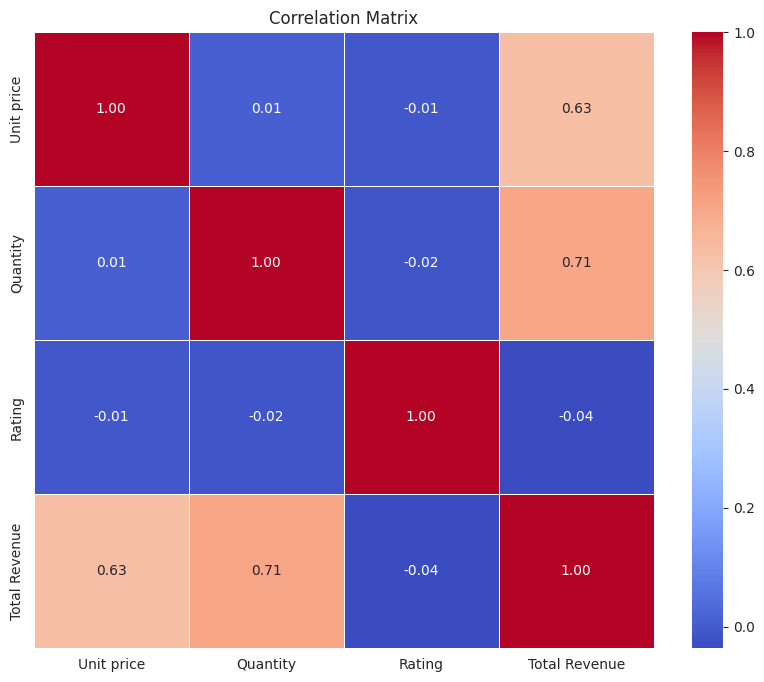

In [79]:

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

**'Home and lifestyle'** and **'Electronic accessories'** should be the focus area for April of 2019-

1.   **'Home and lifestyle'** produced the 3rd most revenue in January but suddenly dipped in February to the lowest share among all yet the category rose to the top most share in the most recent month of March and that too by a significant margin. This may signify shortage or limited supply of 'Home and lifestyle' products in the stores during February rather than some cosumer related trend (since such sudden dip shouldn't be observed otherwise). Hence its neccessary to have surplus supply of this category for the month of April since the upward trend might very well continue.
2.   **'Electronic accessories'** have observed a steady rise in terms of total sales over the 3 months hence we can expect the same trend for the month of April 2019 as well.

3. The correlation plot between the Unit Price, Quantity, Ratings and Total Revenue show that Revenue is more dependent on Quantity than the Unit Price. Hence more focus should be put into selling more units than increasing the unit price as a rule of thumb.